CS524 Assignment 1

In [10]:
using JuMP, Clp

1.Warm-up

1a. I would choose solver Clp. Since all of these solvers allow solving Linear Program optimization model, but they differ in speed. This problem is a typical simple linear program model, solver Clp can run faster the other two, so I would choose Clp.

In [11]:
#1b

m = Model(solver = ClpSolver())

@variable(m, 0 <= x1 <= 3)           
@variable(m, 0 <= x2 <= 3)          
@constraint(m, x1 + x2 >= 2)        
@constraint(m, 2x1 + x2 <= 5)          
@objective(m, Max, 5x1 - x2)           

setsolver(m, ClpSolver())

status = solve(m)
println("The optimal objective value is ", getobjectivevalue(m), ".")
println("The optimal solution is: x1 = ", getvalue(x1), ", x2 = ", getvalue(x2))

The optimal objective value is 12.5.
The optimal solution is: x1 = 2.5, x2 = 0.0


In [12]:
#1c
println(status)

Optimal


In [13]:
#1d

m = Model(solver = ClpSolver())

@variable(m, 0 <= x1 <= 3)           
@variable(m, 0 <= x2 <= 3)           
@constraint(m, x1 + x2 >= 2)        
@constraint(m, 2x1 + x2 <= 0)          
@objective(m, Max, 5x1 - x2)           

setsolver(m, ClpSolver())

status = solve(m)
println(status)
println("The optimal objective value is ", getobjectivevalue(m), ".")
println("The optimal solution is: x1 = ", getvalue(x1), ", x2 = ", getvalue(x2))

Infeasible
The optimal objective value is NaN.
The optimal solution is: x1 = NaN, x2 = NaN


┌ Warning: Not solved to optimality, status: Infeasible
└ @ JuMP /mnt/juliabox/.julia/packages/JuMP/PbnIJ/src/solvers.jl:212
┌ Warning: Variable value not defined for x1. Check that the model was properly solved.
└ @ JuMP /mnt/juliabox/.julia/packages/JuMP/PbnIJ/src/JuMP.jl:448
┌ Warning: Variable value not defined for x2. Check that the model was properly solved.
└ @ JuMP /mnt/juliabox/.julia/packages/JuMP/PbnIJ/src/JuMP.jl:448


According to the result, this is infeasible operation, the solution is not going to be optimal.

2.Crop planning

In [14]:
#2a

model = Model(solver = ClpSolver())

@variable(model, 0 <= w <= 45)           # wheat acres
@variable(model, 0 <= c <= 45)           # corn acres
@constraint(model, w + c <= 45)
@constraint(model, 3w + 2c <= 100)        # total number of workers
@constraint(model, 2w + 4c <= 130)          # total number of fertilizer
@objective(model, Max, 230w + 190c)           # maximize profit

status = solve(model)
println("The maximized profit is ", getobjectivevalue(model), ".")
println("The optimal solution is: wheat acres = ", getvalue(w), ",
    corn acres = ", getvalue(c))

The maximized profit is 8537.5.
The optimal solution is: wheat acres = 17.499999999999993,
    corn acres = 23.750000000000004


#2b
Problem Data

In [15]:
# the types of plants plant
plants = [:wheat, :corn]

# workers required for each type of trophy (in board feet)
workers   = Dict( :wheat => 3, :corn => 2)

# fertilizers required for each type of plant
fertilizers = Dict( :wheat => 2, :corn => 4)

# profit made for each acre of plant
profit = Dict( :wheat => 230, :corn => 190)


# quantities in stock for each ingredient
num_workers     = 100
num_fertilizers  = 130
num_acres = 45
num_wheat = 45
num_corn = 45
;

Problem Model

In [16]:

model = Model(solver = ClpSolver())

@variable(model, trophies[plants] >= 0 )    

@expression(model, tot_workers, sum(trophies[i] * workers[i] for i in plants))
@expression(model, tot_fertilizers, sum(trophies[i] * fertilizers[i] for i in plants))
@expression(model, tot_profit, sum(trophies[i] * profit[i]  for i in plants))
@expression(model, tot_acres, sum(trophies[i] for i in plants) )

@constraint(model, trophies[:wheat] <= num_wheat )      # maximum acres of wheat
@constraint(model, trophies[:corn] <= num_corn )  # maximum acres of corn
@constraint(model, tot_workers <= num_workers )           # maximum number of workers
@constraint(model, tot_fertilizers <= num_fertilizers )  # maximum amount of fertilizers
@constraint(model, tot_acres <= num_acres)

@objective(model, Max, tot_profit)

solve(model)
println(getvalue(trophies))
println("Total profit will be \$", getvalue(tot_profit))
println("Total number of workers used is ", getvalue(tot_workers))
println("Total fertilizers used is ", getvalue(tot_fertilizers))

trophies: 1 dimensions:
[wheat] = 17.499999999999993
[ corn] = 23.750000000000004
Total profit will be $8537.5
Total number of workers used is 99.99999999999999
Total fertilizers used is 130.0


The solution is the same as 2a.

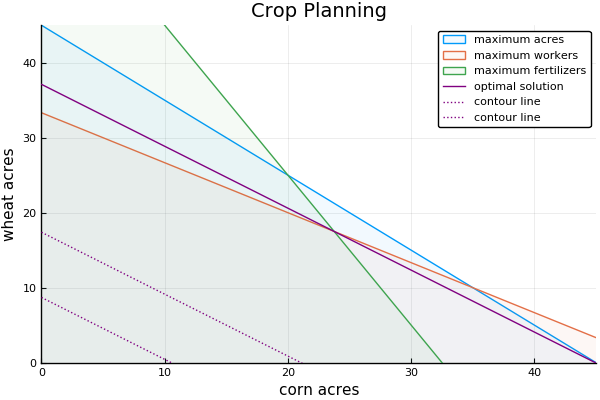

In [17]:
using Plots
pyplot()
x = range(0, stop = 45, length = 50) |> collect

y = 45 .- x
z = 100/3 .- (2/3)x 
m = 65 .- 2x
n = 8537.5/230 .- (190/230)x
n1 = 4000/230 .- (190/230)x
n2 = 2000/230 .- (190/230)x
plot(x, y, xlim = (0,45), ylim = (0,45), xlabel = "corn acres", ylabel = "wheat acres",
    fill=(0, 0.05, :auto), label="maximum acres", title="Crop Planning")
plot!(x, z, fill=(0, 0.05, :auto), label="maximum workers")
plot!(x, m, fill=(0, 0.05, :auto), label="maximum fertilizers")
plot!(x,n, label = "contour line w/ optimal solution", linecolor = :purple)
plot!(x, n1, label = "contour line", linestyle = :dot, linecolor = :purple)
plot!(x, n2, label = "contour line", linestyle = :dot, linecolor = :purple)


The feasible set are the areas on the graph that are shaded by all three regions. The optimal solution is the point at which green line and orange line intersects, and it matches with the previous solution.